In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

In [2]:
import numpy as np

In [3]:
import lal
import lalsimulation as lalsim

In [4]:
from scrinet.interfaces import lalutils, rotations

In [5]:
# params = lalutils.gen_td_modes_wf_params(m2=5, approximant=lalsim.SEOBNRv4PHM)
params = lalutils.gen_td_modes_wf_params(m1=100, m2=20, approximant=lalsim.SEOBNRv4PHM, S1x=0.5, S1y=0.5, S2x=0.5, S2y=0.5, f_min=12, f_ref=12, phiRef=1.2)
# params = lalutils.gen_td_modes_wf_params(m2=30, approximant=lalsim.NRSur7dq4, S1x=0.5, S1y=0., f_min=14, f_ref=14)

In [6]:
params

{'m1': 100,
 'm2': 20,
 'S1x': 0.5,
 'S1y': 0.5,
 'S1z': 0,
 'S2x': 0.5,
 'S2y': 0.5,
 'S2z': 0,
 'phiRef': 1.2,
 'r': 1,
 'deltaT': 0.000244140625,
 'f_min': 12,
 'f_ref': 12,
 'LALpars': None,
 'lmax': 2,
 'approximant': 52}

In [7]:
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])
# times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=False, modes=[[2,2],[2,1],[2,0],[2,-1],[2,-2]])

In [8]:
hlms

{(2,
  2): array([11183.63762149-2758.2886869j , 11131.22459683-2963.8147479j ,
        11075.03627537-3168.34163685j, ...,     0.           -0.j        ,
            0.           -0.j        ,     0.           -0.j        ]),
 (2,
  1): array([78.88714962+558.89158994j, 83.47142663+556.05064546j,
        87.96732459+553.16476913j, ...,  0.          -0.j        ,
         0.          -0.j        ,  0.          -0.j        ]),
 (2,
  0): array([-5.61955388-6.69366049j, -5.72402812-6.75909539j,
        -5.82990942-6.83156913j, ...,  0.        -0.j        ,
         0.        -0.j        ,  0.        -0.j        ]),
 (2,
  -1): array([190.60683566-1011.57620831j, 200.46907162-1011.86767775j,
        210.3948855 -1012.07110709j, ...,   0.           -0.j        ,
          0.           -0.j        ,   0.           -0.j        ]),
 (2,
  -2): array([11151.80154764+2752.82333599j, 11099.19991959+2957.71074907j,
        11042.83217927+3161.59497224j, ...,     0.           -0.j        ,
       

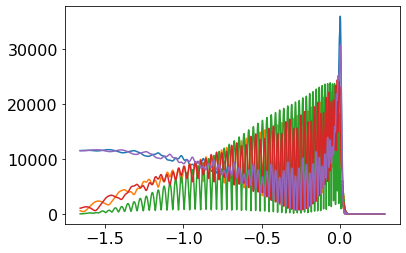

In [9]:
plt.figure()
plt.plot(times, np.abs(hlms[(2,2)]))
plt.plot(times, np.abs(hlms[(2,1)]))
plt.plot(times, np.abs(hlms[(2,0)]))
plt.plot(times, np.abs(hlms[(2,-1)]))
plt.plot(times, np.abs(hlms[(2,-2)]))

In [10]:
params

{'m1': 100,
 'm2': 20,
 'S1x': 0.5,
 'S1y': 0.5,
 'S1z': 0,
 'S2x': 0.5,
 'S2y': 0.5,
 'S2z': 0,
 'phiRef': 1.2,
 'r': 1,
 'deltaT': 0.000244140625,
 'f_min': 12,
 'f_ref': 12,
 'LALpars': None,
 'lmax': 2,
 'approximant': 52}

In [11]:
thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

0.7371407751049505 1.2246467991473532e-16 -0.7853981633974483


In [13]:
?rotations.WaveformRotations

Init signature: rotations.WaveformRotations(times, hlms, frame, *args, **kwargs)
Docstring:      <no docstring>
Init docstring:
A class to perform rotations to modes
times: 1d array of times
hlms: dict of complex modes
    {(l,m):complex_modes}
alpha0, thetaJN, phi0: angles to go from L (LAL) inertial frame to J inertial frame
frame: str choices: ['inertial-L', 'inertial-J', 'coprec']

if frame is 'inertial-L'
required_args = ['alpha0', 'thetaJN', 'phi0']
passed as kwargs

if frame is 'coprec'
required_args = ['alpha', 'beta', 'gamma']
passed as kwargs

modifies hlms in-place. To find out what frame you are in
use self.frame.
File:           ~/work/git/stk/scrinet/scrinet/interfaces/rotations.py
Type:           type
Subclasses:     


In [14]:
wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

In [15]:
def plot_modes(wr):
    plt.figure()
    plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,0)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-1)]))
    plt.plot(wr.times, np.abs(wr.hlms[(2,-2)]))
    plt.title(wr.frame)
    plt.show()
    plt.close()

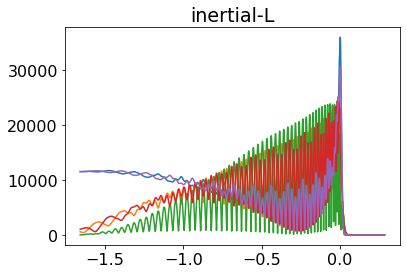

In [16]:
plot_modes(wr)

In [17]:
wr.from_inertial_frame_to_coprecessing_frame()

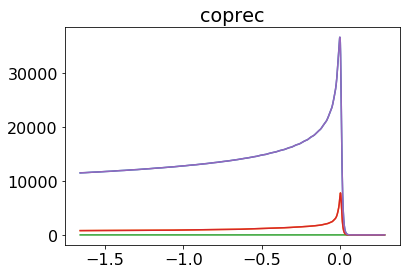

In [18]:
plot_modes(wr)

In [19]:
wr.from_coprecessing_frame_to_inertial_frame()

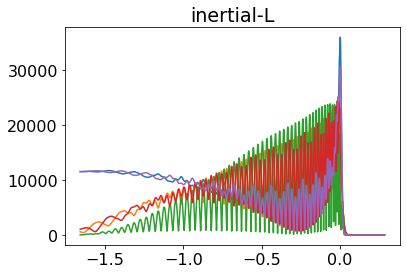

In [20]:
plot_modes(wr)

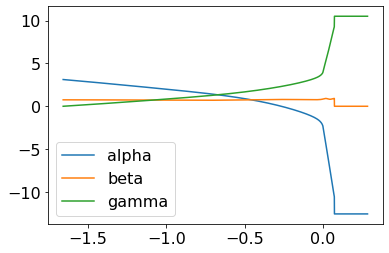

In [21]:
plt.figure()
plt.plot(wr.times, wr.alpha, label='alpha')
plt.plot(wr.times, wr.beta, label='beta')
plt.plot(wr.times, wr.gamma, label='gamma')
plt.legend()

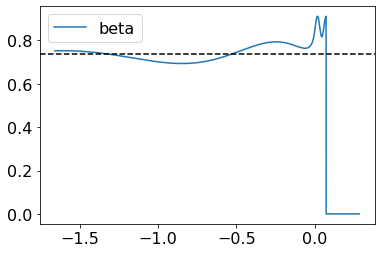

In [22]:
plt.figure()
plt.plot(wr.times, wr.beta, label='beta')
plt.legend()
plt.axhline(wr.thetaJN, c='k', ls='--')

# compare two cases

In [23]:
import phenom

In [24]:
m1, m2 = phenom.m1_m2_M_q(60, 4.64)

In [25]:
chi1x = 0.0708
chi1z = -0.008011

0.06471467470188476 1.2246467991473532e-16 -0.0


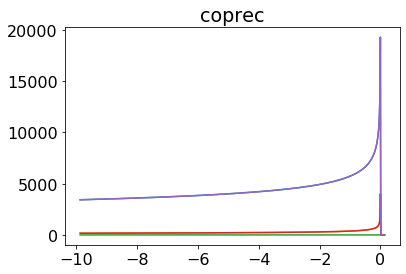

In [26]:
params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

wr.from_inertial_frame_to_coprecessing_frame()

plot_modes(wr)

In [27]:
m1, m2 = phenom.m1_m2_M_q(60, 4.2370)

In [28]:
chi1x = 0.87083618
chi1z = 0.1320566

0.5772200101199395 1.2246467991473532e-16 -0.0


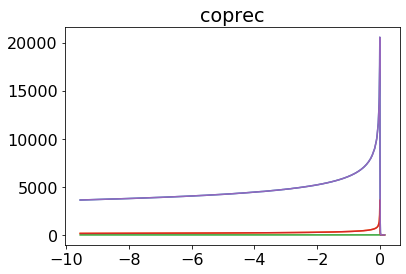

In [29]:
params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr2 = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

wr2.from_inertial_frame_to_coprecessing_frame()

plot_modes(wr2)

In [30]:
def phase_from_complex(complex_number):
    return np.unwrap(np.angle(complex_number))

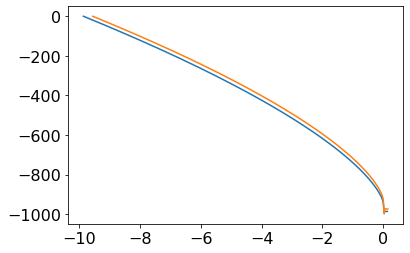

In [31]:
plt.figure()
plt.plot(wr.times, phase_from_complex(wr.hlms[(2,2)]))
plt.plot(wr2.times, phase_from_complex(wr2.hlms[(2,2)]))

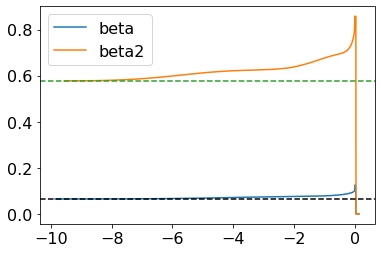

In [32]:
plt.figure()
plt.plot(wr.times, wr.beta, label='beta')
# plt.plot(wr2.times, np.arccos(-np.cos(wr2.beta)), label='beta2')
plt.plot(wr2.times, wr2.beta, label='beta2')
plt.legend()
plt.axhline(wr.thetaJN, c='k', ls='--')
plt.axhline(wr2.thetaJN, c='C2', ls='--')

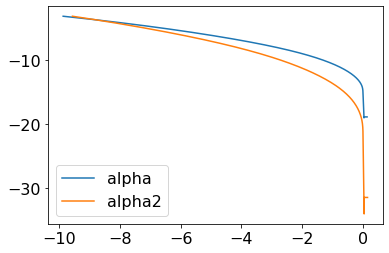

In [33]:
plt.figure()
plt.plot(wr.times, wr.alpha, label='alpha')
plt.plot(wr2.times, wr2.alpha, label='alpha2')
plt.legend()

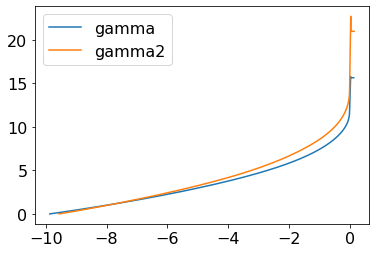

In [34]:
plt.figure()
plt.plot(wr.times, wr.gamma, label='gamma')
plt.plot(wr2.times, wr2.gamma, label='gamma2')
plt.legend()

# single case

In [35]:
# m1, m2 = phenom.m1_m2_M_q(60, 4.8677892)
# chi1x = 0.567374
# chi1z = -0.69328489

In [36]:
# m1, m2 = phenom.m1_m2_M_q(60, 5.7974587)
# chi1x = 0.30599447
# chi1z = -0.76121752

m1, m2 = phenom.m1_m2_M_q(60, 5.8)
chi1x = 0.31
chi1z = -0.77

1.2287639597304765 1.2246467991473532e-16 -0.0


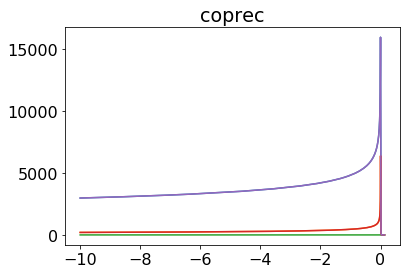

In [37]:
params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

wr.from_inertial_frame_to_coprecessing_frame()

plot_modes(wr)

(-0.1, 0.1)

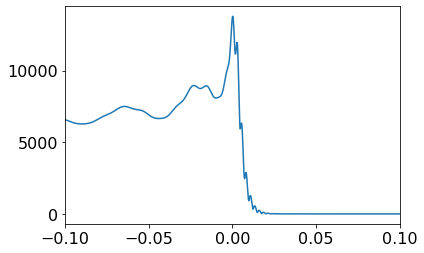

In [38]:
plt.figure()
plt.plot(times, np.abs(hlms[(2,2)]))
plt.xlim(-0.1,0.1)

(-1.1, 0.1)

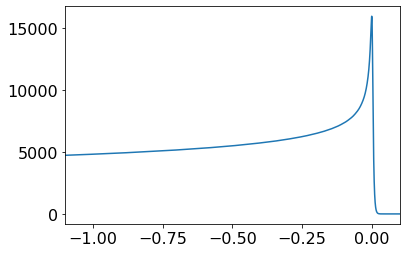

In [39]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.xlim(-1.1,0.1)

In [40]:
phenom.StoM(wr.times, 60)

array([-33804.35426031, -33803.52814767, -33802.70203502, ...,
          447.92820676,    448.75431941,    449.58043205])

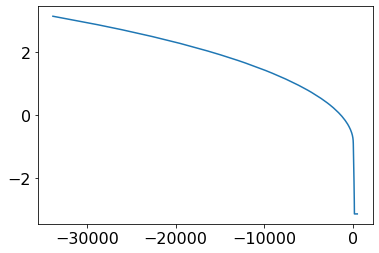

In [41]:
plt.figure()
plt.plot(phenom.StoM(wr.times, 60), wr.alpha)
# plt.xlim(-100,100)

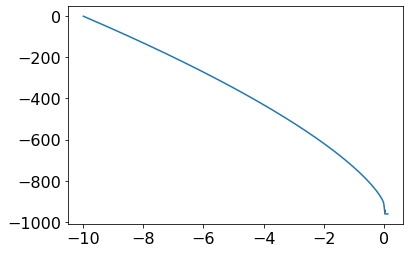

In [42]:
plt.figure()
plt.plot(wr.times, phase_from_complex(wr.hlms[(2,2)]))

(-1, 1)

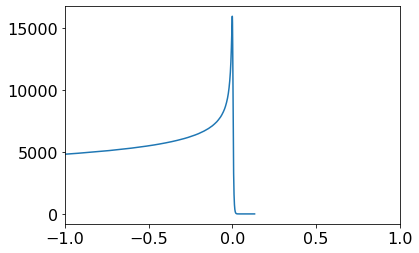

In [43]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.xlim(-1,1)

# negative chi1z

In [44]:
# m1, m2 = phenom.m1_m2_M_q(60, 5.7974587)
# chi1x = 0.30599447
# chi1z = -0.76121752

m1, m2 = phenom.m1_m2_M_q(60, 5.8)
chi1x = 0.31
chi1z = 0.77

0.18567340354768072 1.2246467991473532e-16 -0.0


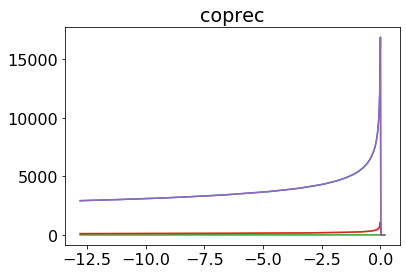

In [45]:
params = lalutils.gen_td_modes_wf_params(m1=m1, m2=m2, approximant=lalsim.SEOBNRv4PHM, S1x=chi1x, S1z=chi1z, f_min=10, f_ref=10)
times, hlms = lalutils.gen_td_modes_wf(params, eob_all_ell_2_modes=True, modes=[[2,2],[2,1]])

thetaJN, alpha0, phi_aligned = rotations.compute_L_to_J_angles(
    mass1=params['m1'], mass2=params['m2'], f_ref=params['f_min'], inc=0, phiref=params['phiRef'],
    spin1x=params['S1x'], spin1y=params['S1y'], spin1z=params['S1z'],
    spin2x=params['S2x'], spin2y=params['S2y'], spin2z=params['S2z'])
print(thetaJN, alpha0, phi_aligned)

wr = rotations.WaveformRotations(times=times, hlms=hlms, frame='inertial-L', alpha0=alpha0, thetaJN=thetaJN, phi0=phi_aligned)

wr.from_inertial_frame_to_coprecessing_frame()

plot_modes(wr)

(-0.1, 0.1)

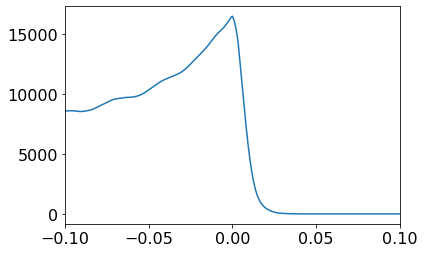

In [46]:
plt.figure()
plt.plot(times, np.abs(hlms[(2,2)]))
plt.xlim(-0.1,0.1)

(-1.1, 0.1)

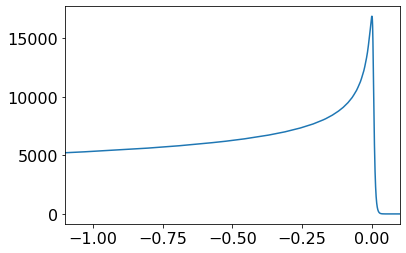

In [47]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.xlim(-1.1,0.1)

In [48]:
phenom.StoM(wr.times, 60)

array([-43268.44808871, -43267.62197607, -43266.79586342, ...,
          592.35054677,    593.17665941,    594.00277206])

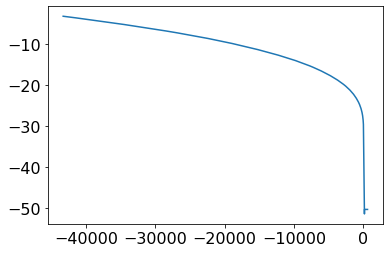

In [49]:
plt.figure()
plt.plot(phenom.StoM(wr.times, 60), wr.alpha)
# plt.xlim(-100,100)

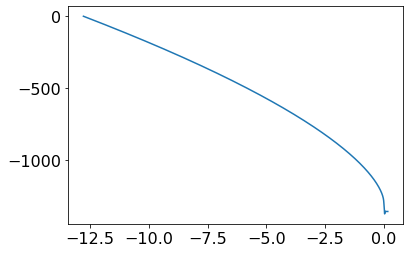

In [50]:
plt.figure()
plt.plot(wr.times, phase_from_complex(wr.hlms[(2,2)]))

(-1, 1)

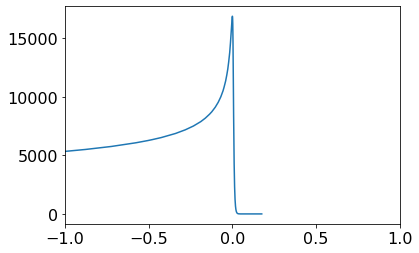

In [51]:
plt.figure()
plt.plot(wr.times, np.abs(wr.hlms[(2,2)]))
plt.xlim(-1,1)